<a href="https://colab.research.google.com/github/AndreyV80/NetStudy/blob/main/%D0%94%D0%A0_%D1%80%D0%B0%D0%B1_(13_10_21).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm # 
from statsmodels.iolib.table import SimpleTable #
from sklearn.metrics import r2_score  #
# import ml_metrics as metrics  #нет загрузки


Загружаем ранее сохраненные данные

Динамика по России

In [ ]:
DynamicRussiaDay = pd.read_csv('C:/Users/IT/Desktop/Netology/Диплом/DynamicRussiaDay.csv', sep=',', parse_dates=['DateTime'])
testRusAll = DynamicRussiaDay[['DateTime', 'Заражений за день']].copy()
testRusAll = testRusAll.set_index('DateTime')

In [ ]:
print(testRusAll.shape) #проверяем количество строк и столбцов

(562, 1)


In [ ]:
testRusAll.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 562 entries, 2020-03-12 to 2021-09-24
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Заражений за день  562 non-null    int64
dtypes: int64(1)
memory usage: 8.8 KB


In [ ]:
testRusAll['Заражений за день'].sum()

7376374

Динамика по региону

In [ ]:
DynamicIvDay = pd.read_excel('C:/Users/IT/Desktop/Netology/DynamicIvDay_2.xls')

DynamicIvDay_test = DynamicIvDay.set_index('DateTime')

In [ ]:
DynamicIvDay_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 562 entries, 2020-03-12 to 2021-09-24
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Заражения  562 non-null    int64
dtypes: int64(1)
memory usage: 8.8 KB


Данные по заболеваемости медиков в регионе

In [ ]:
MedicIv_COVID = pd.read_excel('C:/Users/IT/Desktop/Netology/Диплом/MedicIv_COVID.xls')

In [ ]:
MedicIv_COVID.head()

,УНРЗ,ts,Субъект РФ,Медицинская организация (лечение),Диагноз,Нозология,Дата включения,Дата исключения,Причина исключения,Должность,Медицинская организация (место работы)
0,371032000003314,1584835200000000000,Ивановская область,ОБУЗ 1 ГКБ,U07.1,COVID,2020-03-22,2020-04-03,Выздоровление,врач-нейрохирург,"ОБУЗ ""ИвОКБ"""
1,371032000002940,1585008000000000000,Ивановская область,ОБУЗ 1 ГКБ,U07.1,COVID,2020-03-24,2020-04-06,Выздоровление,врач-нейрохирург,"ОБУЗ ""ИвОКБ"""
2,371032000196749,1585612800000000000,Ивановская область,ОБУЗ 1 ГКБ,U07.1,COVID,2020-03-31,2020-04-20,Выздоровление,врач-хирург,ОБУЗ 1 ГКБ
3,371042000006545,1585785600000000000,Ивановская область,ОБУЗ Ильинская ЦРБ,U07.1,COVID,2020-04-02,2020-04-19,Выздоровление,врач-невролог,ОБУЗ ИКБ им. Куваевых
4,371032000006783,1585785600000000000,Ивановская область,"ОБУЗ ""Шуйская ЦРБ""",U07.1,COVID,2020-04-02,2020-04-04,Выздоровление,медицинская сестра палатная (постовая),"ОБУЗ ""ИвОКБ"""


In [ ]:
MedicIv_COVID_test = MedicIv_COVID.copy() # создаем рабочую версию датафрейма
MedicIv_COVID_test_2 = MedicIv_COVID_test[['УНРЗ','Дата включения']] # срез рабочего датафрейма

Сведем данные в сводную таблицу, где в качестве индекса будут выступать даты включения в реестр и количество записей по дате

In [ ]:
MedicIv_COVID_test_2 = MedicIv_COVID_test_2.pivot_table('УНРЗ',index='Дата включения', aggfunc='count')

In [ ]:
MedicIv_COVID_test_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 481 entries, 2020-03-22 to 2021-09-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   УНРЗ    481 non-null    int64
dtypes: int64(1)
memory usage: 7.5 KB


In [ ]:
MedicIv_COVID_test_2.head()

,УНРЗ
Дата включения,
2020-03-22,1
2020-03-24,1
2020-03-31,1
2020-04-02,2
2020-04-04,1


Данные о профессиональности заболеваний медиков в регионе

In [ ]:
Occupational_disease = pd.read_excel('C:/Users/IT/Desktop/Netology/Social_payment.xlsx')
Occupational_disease_test = Occupational_disease[['date_start','id_medic','sum_payment']]

In [ ]:
Occupational_disease_test.head()

,date_start,id_medic,sum_payment
0,2020-02-01,4501876642,68811
1,2020-04-03,3346680854,68811
2,2020-04-09,3919878712,68811
3,2020-04-12,6775473308,68811
4,2020-04-13,5212927227,68811


Также сведем данные в сводную таблицу, где в качестве индекса будут выступать даты включения в реестр и количество записей по дате

In [ ]:
Occupational_disease_test_pivot = Occupational_disease_test.pivot_table('sum_payment', index='date_start',aggfunc='count')

In [ ]:
Occupational_disease_test_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 400 entries, 2020-02-01 to 2021-08-28
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   sum_payment  400 non-null    int64
dtypes: int64(1)
memory usage: 6.2 KB


Здесь необходимо обратить внимание на то, что период "2020-02-01 to 2021-08-28"

Визуализация заболеваемости COVID

In [ ]:
# DynamicIvDay_test = DynamicIvDay.copy()

<AxesSubplot:xlabel='date_start'>

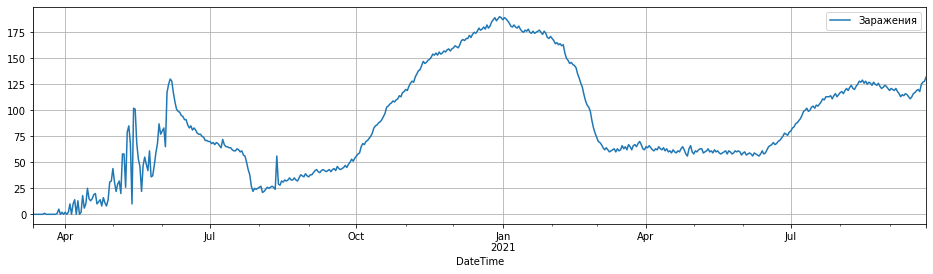

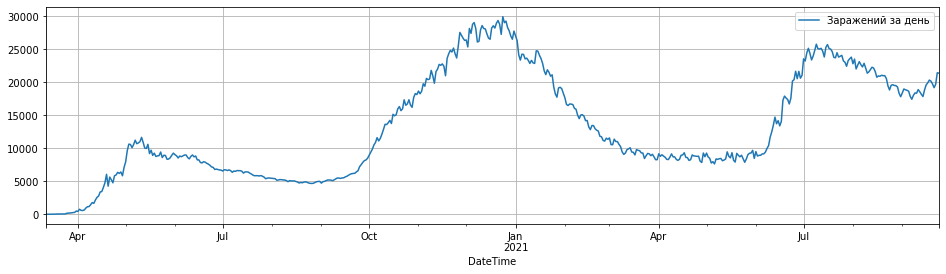

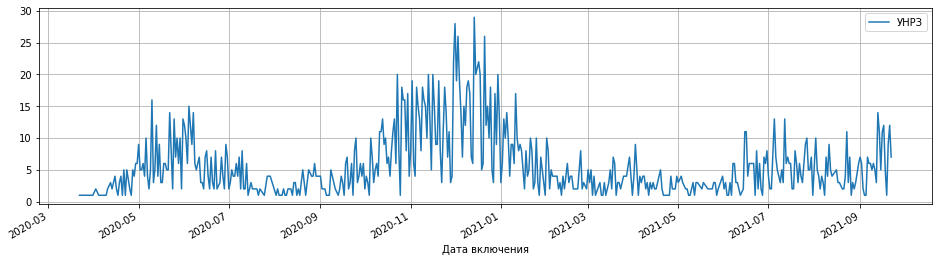

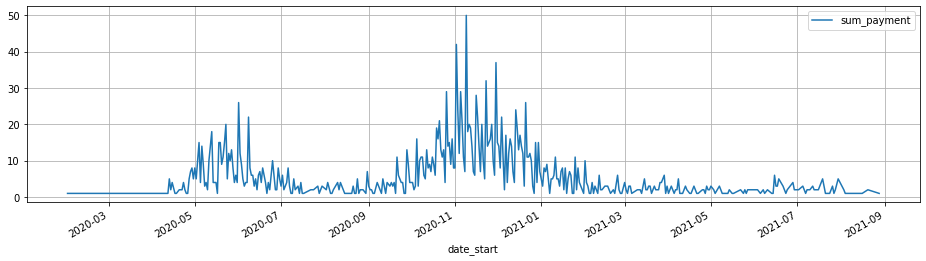

In [ ]:
DynamicIvDay_test.plot(figsize=(16,4), grid=True) #регион общие данные
testRusAll.plot(figsize=(16,4), grid=True)  #России общие данные 
MedicIv_COVID_test_2.plot(figsize=(16,4), grid=True) # Данные о заболевании медиков в регионе - общие
Occupational_disease_test_pivot.plot(figsize=(16,4), grid=True) #профзаболевания медиков по региону

Исходя из данных, можно увидеть спады и подъемы забалеваемости COVID, при этом они, можно сказать, синхронизированы. Наблюдается всплески в периоды: май-июль 2020, октябрь 2020-январь 2021, июль 2021

Предлагаю для дальнейшего наглядного анализа объединить датафреймы

In [ ]:
df_Rus_Iv_merge = testRusAll.merge(DynamicIvDay_test, how='left', left_on='DateTime', right_on='DateTime')
# df_Rus_Iv_merge.head()

In [ ]:
df_Rus_Iv_merge.head()

,Заражений за день,Заражения
DateTime,,
2020-03-12,34,0
2020-03-13,11,0
2020-03-14,14,0
2020-03-15,4,0
2020-03-16,28,0


In [ ]:
# df_Rus_Iv_Med_merge = df_Rus_Iv_merge.merge(MedicIv_COVID_test_2, how='left', left_on='DateTime', right_on='Дата включения')

In [ ]:
df_Rus_Iv_Med_merge = df_Rus_Iv_merge.merge(MedicIv_COVID_test_2, how='left', left_index=True, right_index=True)

In [ ]:
df_Rus_Iv_Med_merge.tail()

,Заражений за день,Заражения,УНРЗ
DateTime,,,
2021-09-20,19744,118,9.0
2021-09-21,19179,125,12.0
2021-09-22,19706,127,7.0
2021-09-23,21438,128,NaN
2021-09-24,21379,132,NaN


In [ ]:
df_Rus_Iv_Med_OD_merge = df_Rus_Iv_Med_merge.merge(Occupational_disease_test_pivot, 
                                                   how='left',  left_index=True, right_index=True)

In [ ]:
df_Rus_Iv_Med_OD_merge.head(30)

,Заражений за день,Заражения,УНРЗ,sum_payment
DateTime,,,,
2020-03-12,34,0,NaN,NaN
2020-03-13,11,0,NaN,NaN
2020-03-14,14,0,NaN,NaN
2020-03-15,4,0,NaN,NaN
2020-03-16,28,0,NaN,NaN
2020-03-17,23,0,NaN,NaN
2020-03-18,33,0,NaN,NaN
2020-03-19,52,1,NaN,NaN
2020-03-20,54,0,NaN,NaN


In [ ]:
df_Rus_Iv_Med_OD_merge = df_Rus_Iv_Med_OD_merge.fillna(0) # Переведенем значение "NaN" в "0"

In [ ]:
# преведем столбцы 'Заражений за день'и 'Заражения' к типу float для единобразия
df_Rus_Iv_Med_OD_merge['Заражений за день'] = df_Rus_Iv_Med_OD_merge['Заражений за день'].astype('float64')
df_Rus_Iv_Med_OD_merge['Заражения'] = df_Rus_Iv_Med_OD_merge['Заражения'].astype('float64')

In [ ]:
df_Rus_Iv_Med_OD_merge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 562 entries, 2020-03-12 to 2021-09-24
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Заражений за день  562 non-null    float64
 1   Заражения          562 non-null    float64
 2   УНРЗ               562 non-null    float64
 3   sum_payment        562 non-null    float64
dtypes: float64(4)
memory usage: 42.0 KB


In [ ]:
df_Rus_Iv_Med_OD_merge.describe()

,Заражений за день,Заражения,УНРЗ,sum_payment
count,562.000000,562.000000,562.000000,562.000000
mean,13125.220641,85.512456,5.024911,4.249110
std,7839.270731,50.485776,5.106644,6.229869
min,4.000000,0.000000,0.000000,0.000000
25%,7102.500000,56.000000,1.000000,0.000000
50%,9831.000000,69.000000,4.000000,2.000000
75%,20292.250000,121.000000,7.000000,5.000000
max,29935.000000,190.000000,29.000000,50.000000


Для удобства переименуем названия столбцов

In [ ]:
df_all = df_Rus_Iv_Med_OD_merge.rename({'Заражения':'Заражения по региону','УНРЗ':'Заражения медиков', 'sum_payment':'Профзаболевания медиков'}, axis=1)

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 562 entries, 2020-03-12 to 2021-09-24
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Заражений за день        562 non-null    float64
 1   Заражения по региону     562 non-null    float64
 2   Заражения медиков        562 non-null    float64
 3   Профзаболевания медиков  562 non-null    float64
dtypes: float64(4)
memory usage: 42.0 KB


Визуализируем весь датафрейм

<AxesSubplot:xlabel='DateTime'>

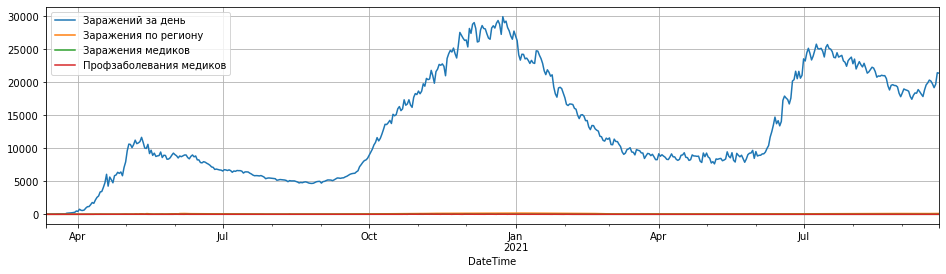

In [ ]:
df_all.plot(figsize=(16,4), grid=True)

Поскольку количественные данные по России значительно превышают данные по региону, в т.ч. медикам, разобъем графики

array([<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
       <AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>],
      dtype=object)

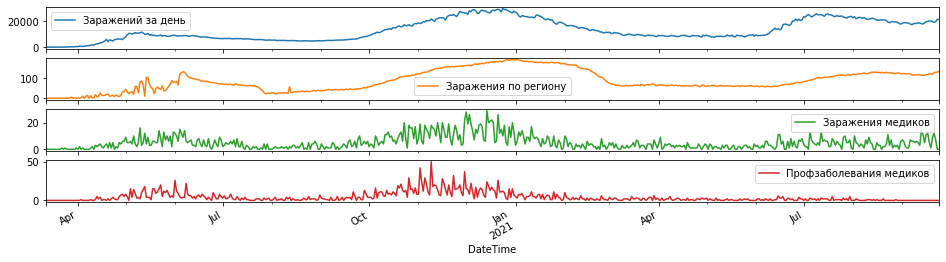

In [ ]:
df_all.plot(subplots=True, figsize=(16,4))

Динамика инфицирования в регионе относительно России

In [ ]:
df_all_copy = df_all.copy()
df_all_copy_test = df_all.copy()

<AxesSubplot:xlabel='DateTime'>

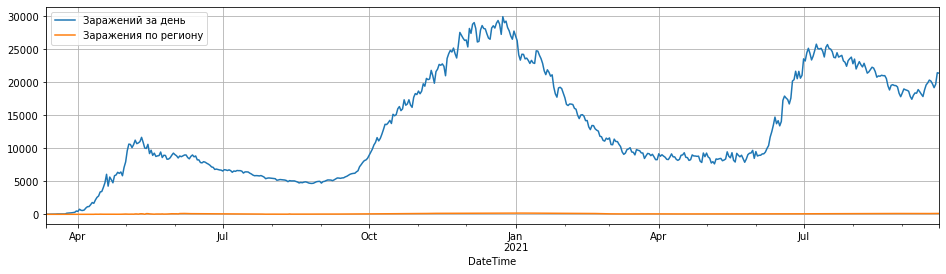

In [ ]:
df_all_copy[['Заражений за день','Заражения по региону']].plot(figsize=(16,4), grid=True) 

Динамика инфицирования медиков, признанных профессиональными, в регионе относительно инфицирования медиков

<AxesSubplot:xlabel='DateTime'>

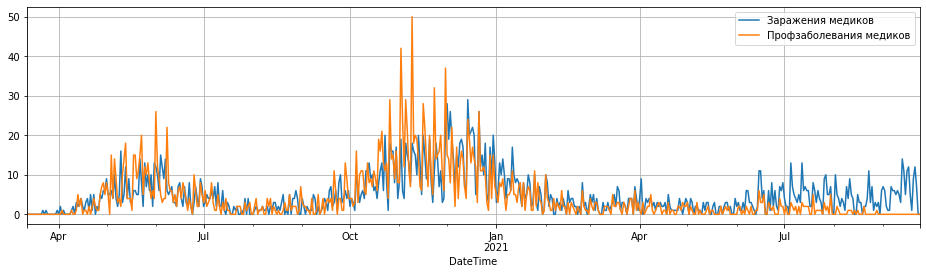

In [ ]:
df_all_copy[['Заражения медиков','Профзаболевания медиков']].plot(figsize=(16,4), grid=True)

Скользящее среднее

In [ ]:
df_roll = df_all_copy_test[['Заражения медиков','Профзаболевания медиков']].rolling(window=24).mean()

In [ ]:
 df_roll.fillna(0)

,Заражения медиков,Профзаболевания медиков
DateTime,,
2020-03-12,0.000000,0.000000
2020-03-13,0.000000,0.000000
2020-03-14,0.000000,0.000000
2020-03-15,0.000000,0.000000
2020-03-16,0.000000,0.000000
...,...,...
2021-09-20,5.583333,0.041667
2021-09-21,6.000000,0.000000
2021-09-22,6.166667,0.000000


<AxesSubplot:xlabel='DateTime'>

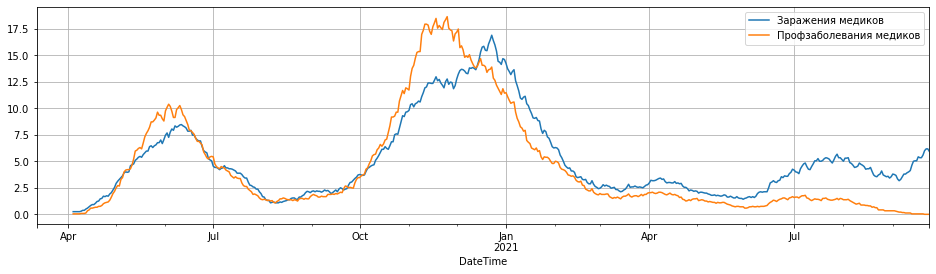

In [ ]:
df_roll.plot(figsize=(16,4), grid=True)

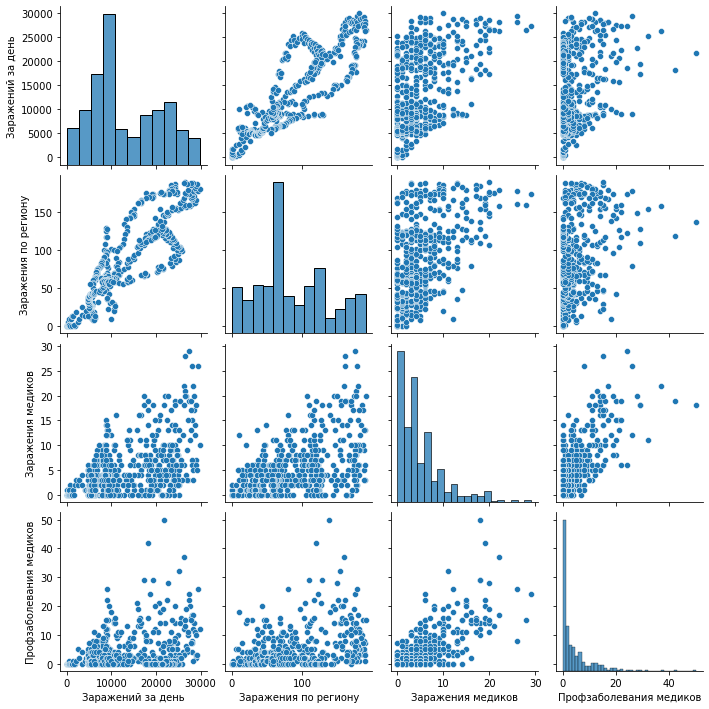

In [ ]:
g = sns.pairplot(df_all_copy)
# g.figure.autofmt_xdate()

Небходимо обратить внимание на то, как коррелируются данные инфицироания по России и региону, а также заболеваний непосредственно медиков и их профессиональности.

In [ ]:
df_all_copy.columns

Index(['Заражений за день', 'Заражения по региону', 'Заражения медиков',
       'Профзаболевания медиков'],
      dtype='object')

Посмотрим как будут выглядеть визуализированные данные, если каждый показатель приведем как долю к общему количеству по столбцу

In [ ]:
df_all_copy['Заражений за день'] = df_all_copy['Заражений за день'] * 1000 / df_all_copy['Заражений за день'].sum()
df_all_copy['Заражения по региону'] = df_all_copy['Заражения по региону'] * 1000 / df_all_copy['Заражения по региону'].sum()
df_all_copy['Заражения медиков'] = df_all_copy['Заражения медиков'] * 1000 / df_all_copy['Заражения медиков'].sum()
df_all_copy['Профзаболевания медиков'] = df_all_copy['Профзаболевания медиков'] * 1000 / df_all_copy['Профзаболевания медиков'].sum()


In [ ]:
df_all_copy.tail()

,Заражений за день,Заражения по региону,Заражения медиков,Профзаболевания медиков
DateTime,,,,
2021-09-20,2.676654,2.455366,3.186969,0.0
2021-09-21,2.600058,2.601024,4.249292,0.0
2021-09-22,2.671502,2.642640,2.478754,0.0
2021-09-23,2.906306,2.663448,0.000000,0.0
2021-09-24,2.898307,2.746681,0.000000,0.0


<AxesSubplot:xlabel='DateTime'>

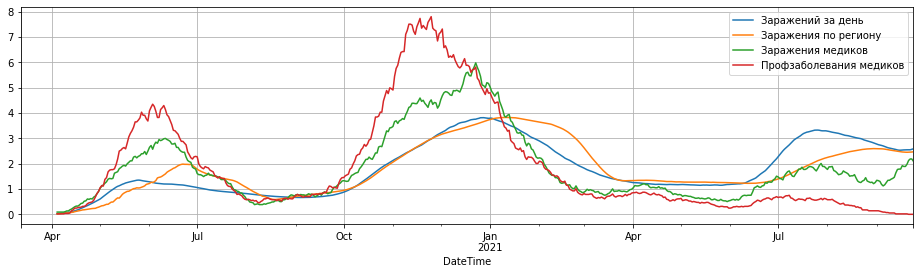

In [ ]:
df_all_copy.rolling(window=24).mean().plot(figsize=(16,4), grid=True)

In [ ]:
#

In [ ]:
df_all_copy_corr = df_all_copy.copy()


In [ ]:
df_all_copy_corr.columns

Index(['Заражений за день', 'Заражения по региону', 'Заражения медиков',
       'Профзаболевания медиков'],
      dtype='object')

In [ ]:
df_all_copy_corr2 = df_all_copy_corr[['Заражения по региону', 'Заражения медиков','Профзаболевания медиков']].corr()

<AxesSubplot:>

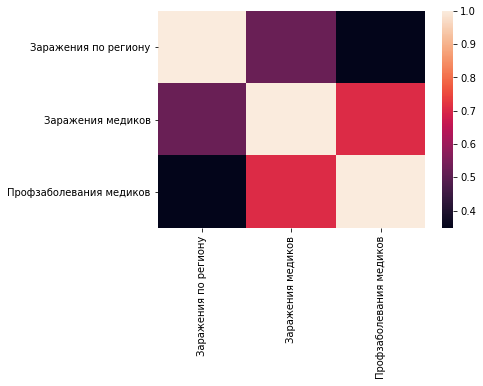

In [ ]:
sns.heatmap(df_all_copy_corr2)

<AxesSubplot:>

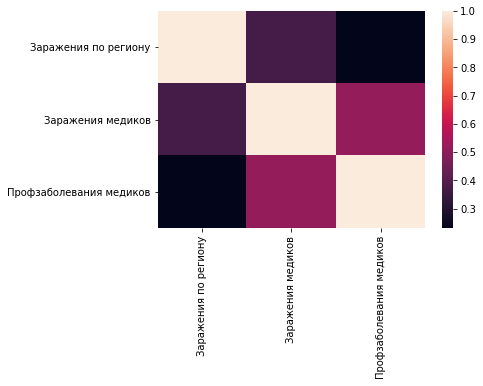

In [ ]:
sns.heatmap(df_all_copy_corr[['Заражения по региону', 'Заражения медиков','Профзаболевания медиков']].corr(method='kendall'))

<AxesSubplot:>

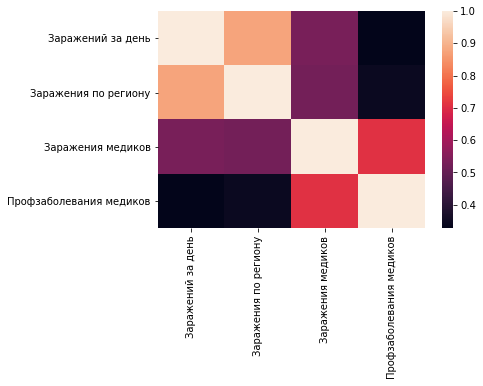

In [ ]:
sns.heatmap(df_all_copy_corr[['Заражений за день', 'Заражения по региону', 'Заражения медиков',
       'Профзаболевания медиков']].corr())

 Предлагаю сделать срез данных, ограничив нижний порог дат - 31 июля 2021. Причина - в неполноте данных по профессиональности заболеваний медработников за сентябрь и август 2021, это связано в большей части с длительности расследования случаев инфицирования.

In [ ]:
df_test = df_all_copy_corr.loc[:'2021-07-31']

<AxesSubplot:>

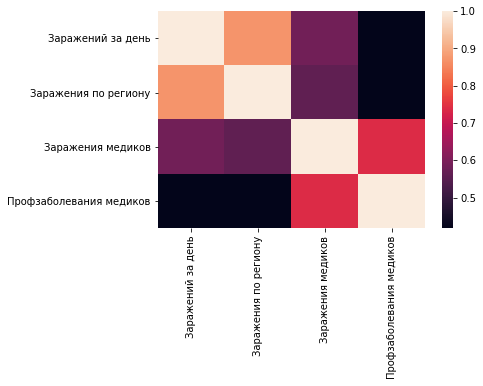

In [ ]:
sns.heatmap(df_test[['Заражений за день', 'Заражения по региону', 'Заражения медиков',
       'Профзаболевания медиков']].corr())


Наблюдается следующее, что даже при ограничивании датафрейма периодом до 01.07.2021 сохраняется взаимосвязи между данными Россия-Регион и данными общими по медработникам - профзаболеваниями. Слабая взаимосвязь между Регион - общая по медработникам

Новый этап

array([[<AxesSubplot:title={'center':'Заражения медиков'}>,
        <AxesSubplot:title={'center':'Профзаболевания медиков'}>]],
      dtype=object)

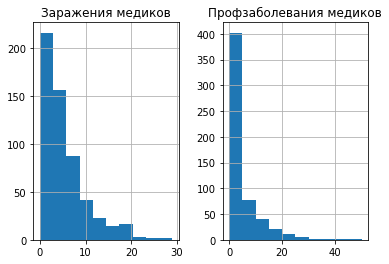

In [ ]:
df_all[['Заражения медиков','Профзаболевания медиков']].hist()

Проведем тест Харки-Бера для определения нормальности распределения

In [ ]:
t1 = df_all['Заражения медиков'].copy()
t1.head()

DateTime
2020-03-12    0.0
2020-03-13    0.0
2020-03-14    0.0
2020-03-15    0.0
2020-03-16    0.0
Name: Заражения медиков, dtype: float64

In [ ]:
row = [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(t1)
a = np.vstack([jb_test])
it1 = SimpleTable(a, row)
print(it1)

        JB                p-value                skew            kurtosis    
-----------------------------------------------------------------------------
470.96411393488233 5.388179705714117e-103 1.661139909572148 6.012441419490808
-----------------------------------------------------------------------------


Не хватает знаний для понимания всего этого

Анализ случаев профзаболеваний: количество случаев, продолжительность заболевания

In [ ]:
# df_all.aggregate('sum')

Заражений за день          7376374.0
Заражения по региону         48058.0
Заражения медиков             2824.0
Профзаболевания медиков       2388.0
dtype: float64

In [ ]:
# Occupational_disease.head()

,Category_medic,Official_Position,id_medic,id_disease,date_start,date_ending,date_payment,sum_payment
0,врач,Врач-педиатр участковый,4501876642,910026060274,2020-02-01,2020-05-08,2020-05-26,68811
1,СМП,медицинская сестра процедурной,3346680854,910025033642,2020-04-03,2020-04-21,2020-06-10,68811
2,СМП,медицинская сестра палатная,3919878712,910025469583,2020-04-09,2020-04-22,2021-08-19,68811
3,СМП,Медсестра палатная,6775473308,910026659544,2020-04-12,2020-04-30,2020-05-21,68811
4,врач,врач торакальный хирург,5212927227,910025190536,2020-04-13,2020-04-30,2020-06-10,68811


In [ ]:
# Occupational_disease_date = Occupational_disease[['id_medic','date_start','date_ending']].copy()

In [ ]:
# Occupational_disease_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_medic     2389 non-null   int64         
 1   date_start   2389 non-null   datetime64[ns]
 2   date_ending  2389 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 56.1 KB


In [ ]:
# Occupational_disease_date['date_start'] = Occupational_disease_date['date_start'].astype('datetime64')
# Occupational_disease_date['date_ending'] = Occupational_disease_date['date_ending'].astype('datetime64')
# Occupational_disease_date.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_medic     2389 non-null   int64         
 1   date_start   2389 non-null   datetime64[ns]
 2   date_ending  2389 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 56.1 KB


In [ ]:
# Occupational_disease_date.loc[Occupational_disease_date['id_medic'] == '3895741302', 'date_start'] = '2020-06-16'

# Occupational_disease_date.loc[Occupational_disease_date['id_medic'] == '3895741302', 'date_ending'] = '2020-06-30'

In [ ]:
# Occupational_disease_date['day_space'] = (Occupational_disease_date['date_ending'] - Occupational_disease_date['date_start']).dt.days

In [ ]:
# Occupational_disease_date.head()

,id_medic,date_start,date_ending,day_space
0,4501876642,2020-02-01 00:00:00,2020-05-08 00:00:00,97
1,3346680854,2020-04-03 00:00:00,2020-04-21 00:00:00,18
2,3919878712,2020-04-09 00:00:00,2020-04-22 00:00:00,13
3,6775473308,2020-04-12 00:00:00,2020-04-30 00:00:00,18
4,5212927227,2020-04-13 00:00:00,2020-04-30 00:00:00,17


In [ ]:
# Occupational_disease_date['day_space'].aggregate(('min', 'max', 'mean'))

min     -14.000000
max     207.000000
mean     21.696944
Name: day_space, dtype: float64

In [ ]:
# Occupational_disease_date[Occupational_disease_date['day_space'] < 0]

,id_medic,date_start,date_ending,day_space
505,3895741302,2020-06-30 00:00:00,2020-06-16 00:00:00,-14


In [ ]:
# Occupational_disease_date['day_space'].aggregate(('min', 'max', 'mean'), axis=0)

min     -14.000000
max     207.000000
mean     21.696944
Name: day_space, dtype: float64

In [ ]:
# from sklearn.linear_model import LinearRegression

# X_train, X_test, y_train, y_test = prepareData(dataset.Users, test_size=0.3, lag_start=12, lag_end=48)
# lr = LinearRegression()
# lr.fit(X_train, y_train)
# prediction = lr.predict(X_test)
# plt.figure(figsize=(15, 7))
# plt.plot(prediction, "r", label="prediction")
# plt.plot(y_test.values, label="actual")
# plt.legend(loc="best")
# plt.title("Linear regression\n Mean absolute error {} users".format(round(mean_absolute_error(prediction, y_test))))
# plt.grid(True);